In [1]:
import numpy as np
import matplotlib.pyplot as plt
from my_tools import *

np.random.seed(0)
plt.rcParams['text.usetex'] = True

In [2]:
a = np.array([1/2, 1/4, -1/4, 1/4, 3/4], dtype=np.float32)
b = np.array([2, 4, 3, 3, 0], dtype=np.float32)

def J(x):
#     функция, которую минимизируем
    return np.dot(a,x)**4 + 2 * np.dot(x-b, x-b) 

def der_J(x):
    # реальная производная с 4, но разницы нет
    return ((np.dot(a,x)**3)*a + x-b) #*4

In [3]:
step_size = 2
len_range = range(5, 100, step_size)
num_lines = 500
step_data = np.zeros((len(len_range), num_lines))
print(len(len_range))

start_points = []
for length in len_range:
    tmp = []
    for line in range(num_lines):
        start_point  = np.random.rand(5)
        start_point = start_point*length/np.linalg.norm(start_point) # приводим к длине length
        tmp.append(start_point)
        
    start_points.append(tmp)

48


In [4]:
start_alpha = 1
eps = 0.01
max_step = 100   
conj_method = "DY"
step_method="armijo" 
c=1
cond="dist"

for length in len_range:
    for line in range(num_lines):
        length_index = (length-len_range[0])//step_size
        start_point = start_points[length_index][line] - (-a+b)
        result, step_number, history = optimize(J, der_J, start_point, 
                                                start_alpha, eps, max_step, 
                                                conj_method, step_method, c, cond)
#         print((length-len_range[0])//step_size)
        step_data[length_index][line] = step_number
    
step_mean = step_data.mean(axis=1)
step_std = step_data.std(axis=1)

Text(0, 0.5, 'std step')

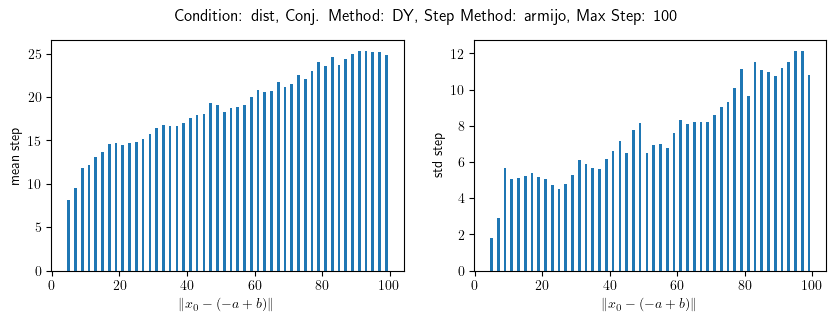

In [5]:
fig, axes = plt.subplots(1, 2, figsize=[10,3])

fig.suptitle("Condition: {}, Conj. Method: {},"
                    " Step Method: {}, Max Step: {}".format(cond, conj_method, step_method, max_step))

axes[0].bar(len_range, step_mean)
axes[0].set_xlabel(r'$\|x_0-(-a+b)\|$')
axes[0].set_ylabel("mean step")

axes[1].bar(len_range, step_std)
axes[1].set_xlabel(r'$\|x_0-(-a+b)\|$')
axes[1].set_ylabel("std step")

# plt.savefig('../prac_tex/imgs/img11.png')

In [6]:
start_alpha = 1
eps = 0.01
max_step = 100   
conj_method = "HZ"
step_method="armijo" 
c=1
cond="dist"

for length in len_range:
    for line in range(num_lines):
        length_index = (length-len_range[0])//step_size
        start_point = start_points[length_index][line]
        result, step_number, history = optimize(J, der_J, start_point, 
                                                start_alpha, eps, max_step, 
                                                conj_method, step_method, c, cond)
#         print((length-len_range[0])//step_size)
        step_data[length_index][line] = step_number

Text(0, 0.5, 'std step')

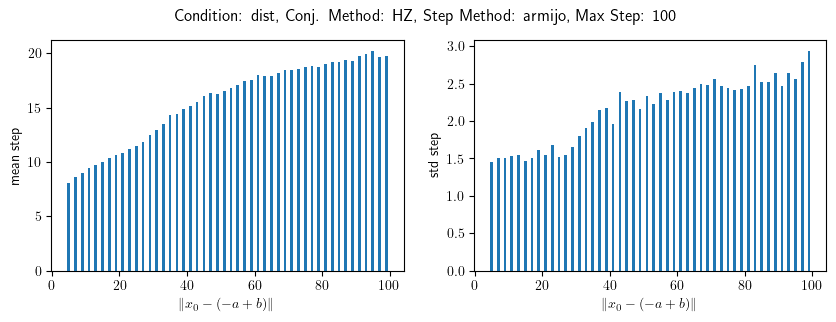

In [7]:
step_mean = step_data.mean(axis=1)
step_std = step_data.std(axis=1)

fig, axes = plt.subplots(1, 2, figsize=[10,3])

fig.suptitle("Condition: {}, Conj. Method: {},"
                    " Step Method: {}, Max Step: {}".format(cond, conj_method, step_method, max_step))

axes[0].bar(len_range, step_mean)
axes[0].set_xlabel(r'$\|x_0-(-a+b)\|$')
axes[0].set_ylabel("mean step")

axes[1].bar(len_range, step_std)
axes[1].set_xlabel(r'$\|x_0-(-a+b)\|$')
axes[1].set_ylabel("std step")

# plt.savefig('../prac_tex/imgs/img12.png')